In [100]:
! pip install geopandas

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV, lars_path, LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [102]:
insights = pd.read_excel('https://github.com/GitHubChampion/Airbnb_652/raw/master/Data/Airbnb_edited_dataset_insights.xlsx', header = 0)
analysis = pd.read_excel('https://github.com/GitHubChampion/Airbnb_652/raw/master/Data/Airbnb_edited_dataset_analysis.xlsx', header = 0)
raw_data_set = pd.read_excel('https://github.com/GitHubChampion/Airbnb_652/raw/master/Data/Airbnb_Raw_dataset_excel.xlsx', header = 0).drop('id', axis = 1)

insights = insights.drop(columns=['host_response_time'])
analysis = analysis.drop(columns=['zipcode', 'host_since'])

print("Raw Shape: ", raw_data_set.shape, "\nModified data set shape:", analysis.shape)
print("Raw Columns: ", raw_data_set.columns, "\nModified Columns:", analysis.columns)

Raw Shape:  (2940, 105) 
Modified data set shape: (2940, 22)
Raw Columns:  Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=105) 
Modified Columns: Index(['host_response_rate', 'host_acceptance_rate', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'availability_

In [103]:
 analysis.info()
 insights.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_rate              2629 non-null   float64
 1   host_acceptance_rate            2824 non-null   float64
 2   neighbourhood_cleansed          2940 non-null   object 
 3   latitude                        2940 non-null   float64
 4   longitude                       2940 non-null   float64
 5   property_type                   2940 non-null   object 
 6   room_type                       2940 non-null   object 
 7   accommodates                    2940 non-null   int64  
 8   bathrooms                       2939 non-null   float64
 9   bedrooms                        2935 non-null   float64
 10  beds                            2926 non-null   float64
 11  price                           2940 non-null   int64  
 12  security_deposit                24

In [104]:
print('Number of Observations for insights: ', insights.shape[0])
print('Number of Variables for insights: ', insights.shape[1])

print('Number of Observations for analysis: ', analysis.shape[0])
print('Number of Variables for analysis: ', analysis.shape[1])


Number of Observations for insights:  2940
Number of Variables for insights:  29
Number of Observations for analysis:  2940
Number of Variables for analysis:  22


In [105]:
#Print Orginial Shape
print(analysis.shape)
print(insights.shape)

#Fill in Zeros where data is empty
analysis.fillna({'host_response_rate':0, 'host_acceptance_rate':0, 'bathrooms':0,'bedrooms':0,'bedrooms':0,'beds':0, 'security_deposit':0}, inplace=True)
analysis.fillna({'cleaning_fee':0, 'reviews_per_month':0, 'host_is_superhost': 'f'}, inplace=True)

insights.fillna({'host_response_rate':0, 'host_acceptance_rate':0, 'bathrooms':0,'bedrooms':0,'bedrooms':0,'beds':0, 'security_deposit':0}, inplace=True)
insights.fillna({'cleaning_fee':0, 'reviews_per_month':0}, inplace=True)

#Replace Boolean Values with True = 1 & False = 0 for Analysis
analysis.instant_bookable = analysis.instant_bookable.replace({'t': 1, 'f': 0})

#View Column Information
analysis.info()
insights.info()

#Drop the rows where there null data after cleanup
analysis = analysis.dropna(axis=0) 
insights = insights.dropna(axis=0) 

#Print Current Shape
print(analysis.shape)
print(insights.shape)


(2940, 22)
(2940, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_rate              2940 non-null   float64
 1   host_acceptance_rate            2940 non-null   float64
 2   neighbourhood_cleansed          2940 non-null   object 
 3   latitude                        2940 non-null   float64
 4   longitude                       2940 non-null   float64
 5   property_type                   2940 non-null   object 
 6   room_type                       2940 non-null   object 
 7   accommodates                    2940 non-null   int64  
 8   bathrooms                       2940 non-null   float64
 9   bedrooms                        2940 non-null   float64
 10  beds                            2940 non-null   float64
 11  price                           2940 non-null   int64  
 12  security_dep

#Encode via Label Encoder for static values


In [0]:
label_encoder = LabelEncoder()
analysis.neighbourhood_cleansed = label_encoder.fit_transform(analysis['neighbourhood_cleansed'])
analysis.property_type = label_encoder.fit_transform(analysis['property_type'])
analysis.room_type = label_encoder.fit_transform(analysis['room_type'])


#Fields after applying Label Encoder

In [107]:
analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2940 entries, 0 to 2939
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_rate              2940 non-null   float64
 1   host_acceptance_rate            2940 non-null   float64
 2   neighbourhood_cleansed          2940 non-null   int64  
 3   latitude                        2940 non-null   float64
 4   longitude                       2940 non-null   float64
 5   property_type                   2940 non-null   int64  
 6   room_type                       2940 non-null   int64  
 7   accommodates                    2940 non-null   int64  
 8   bathrooms                       2940 non-null   float64
 9   bedrooms                        2940 non-null   float64
 10  beds                            2940 non-null   float64
 11  price                           2940 non-null   int64  
 12  security_deposit                29

Text(0.5, 1.0, 'Number of listings per room Type')

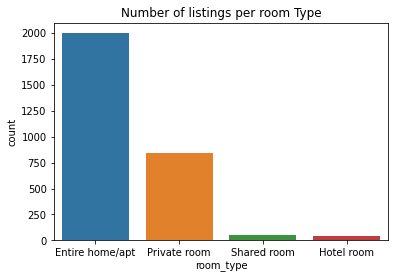

In [108]:
sns.countplot(data=insights, x=insights.room_type)
plt.title("Number of listings per room Type")

#Relationship between the date the host joined Airbnb and the number of total AirBnB listings they have

Text(0, 0.5, 'Date Host joined Airbnb')

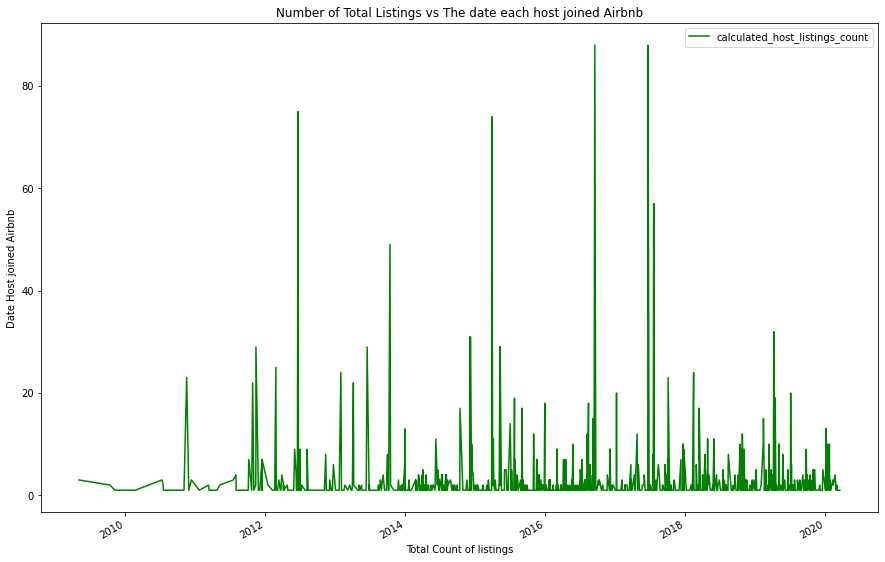

In [109]:

insights.plot( x = 'host_since', y = 'calculated_host_listings_count', color='g', figsize=(15,10)) 
plt.title("Number of Total Listings vs The date each host joined Airbnb")
plt.xlabel("Total Count of listings")
plt.ylabel("Date Host joined Airbnb")


#Top 10 hosts with the most listings

136070735    88
95459395     88
2711146      75
30283594     74
141532723    57
9419684      49
253839975    32
24592423     31
1410306      29
33164249     29
Name: host_id, dtype: int64

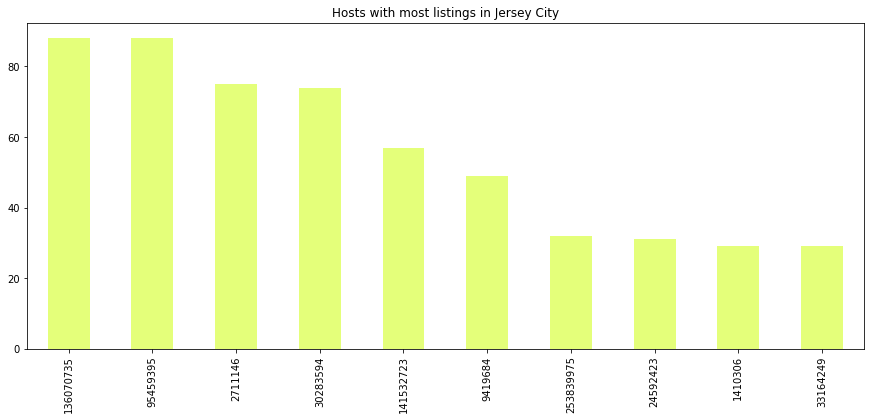

In [110]:
plt.figure(figsize=(15,6))
hosts_counts=insights.host_id.value_counts().head(10)
hosts_counts.plot(title="Hosts with most listings in Jersey City", kind='bar', colormap='Wistia')
hosts_counts



#Top 10 Hosts with the most reviews on their listings in Jersey City

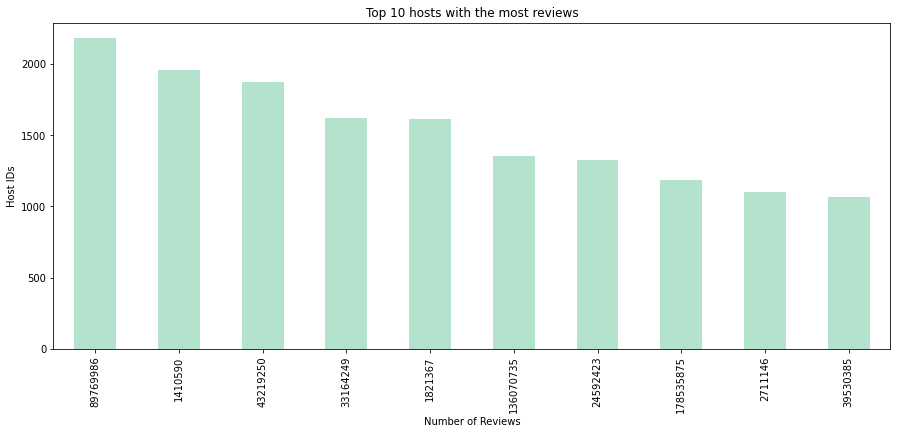

host_id
89769986     2180
1410590      1958
43219250     1872
33164249     1620
1821367      1615
136070735    1355
24592423     1322
178535875    1187
2711146      1101
39530385     1065
Name: number_of_reviews, dtype: int64 
 136070735    88
95459395     88
2711146      75
30283594     74
141532723    57
9419684      49
253839975    32
24592423     31
1410306      29
33164249     29
Name: host_id, dtype: int64


In [111]:
plt.figure(figsize=(15,6))
hosts_review_counts = insights.groupby('host_id').number_of_reviews.sum().sort_values(ascending=False).head(10)

hosts_review_counts.plot(title="Top 10 hosts with the most reviews", kind='bar', colormap='Pastel2')
plt.xlabel("Number of Reviews")
plt.ylabel("Host IDs")
plt.show()
print(hosts_review_counts,'\n', hosts_counts)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

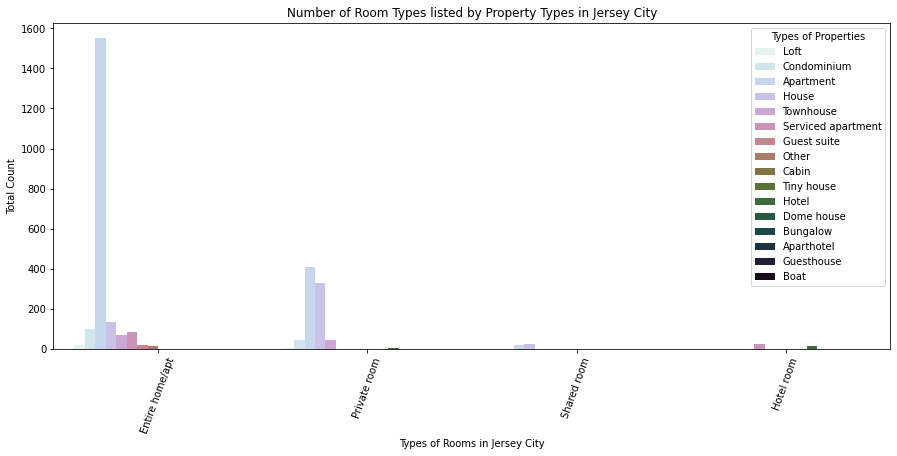

In [112]:
plt.figure(figsize=(15,6))
sns.countplot(data=insights, x='room_type', palette='cubehelix_r', hue='property_type')
plt.title('Number of Room Types listed by Property Types in Jersey City')
plt.xlabel('Types of Rooms in Jersey City')
plt.ylabel("Total Count")
plt.legend(loc='upper right', title='Types of Properties')
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

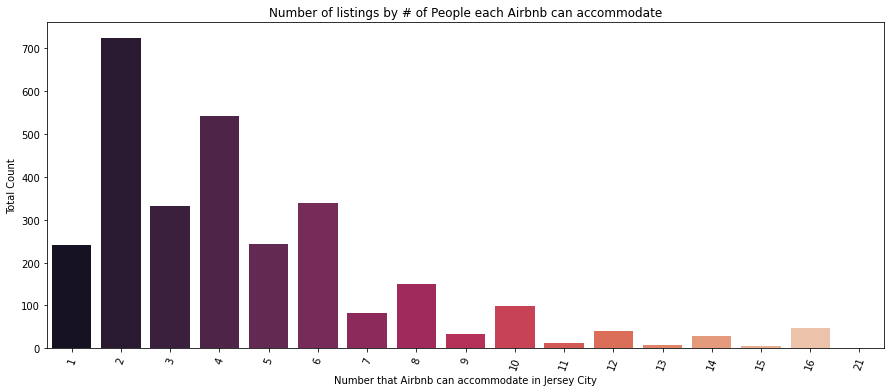

In [113]:
plt.figure(figsize=(15,6))
sns.countplot(data=insights, x='accommodates', palette='rocket')
plt.title('Number of listings by # of People each Airbnb can accommodate')
plt.xlabel('Number that Airbnb can accommodate in Jersey City')
plt.ylabel("Total Count")
plt.xticks(rotation=70)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text major ticklabel objects>)

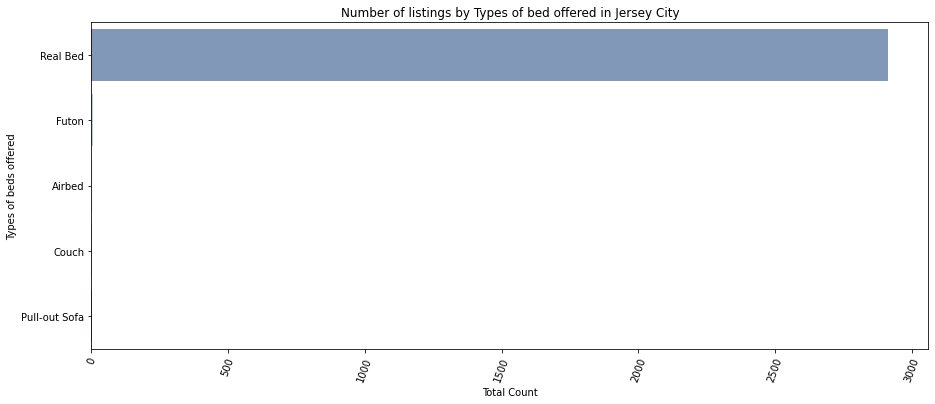

In [114]:
plt.figure(figsize=(15,6))
sns.countplot(data=insights, y='bed_type', palette='vlag')
plt.title('Number of listings by Types of bed offered in Jersey City')
plt.ylabel('Types of beds offered')
plt.xlabel("Total Count")
plt.xticks(rotation=70)



(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 8 Text major ticklabel objects>)

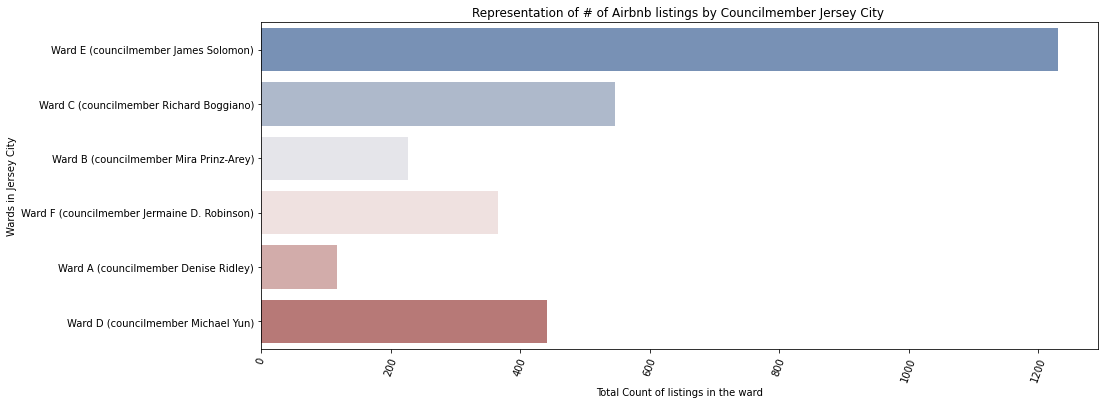

In [115]:
plt.figure(figsize=(15,6))
sns.countplot(data=insights, y='neighbourhood_cleansed', palette='vlag')
plt.title('Representation of # of Airbnb listings by Councilmember Jersey City ')
plt.ylabel('Wards in Jersey City')
plt.xlabel("Total Count of listings in the ward")
plt.xticks(rotation=70)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 8 Text major ticklabel objects>)

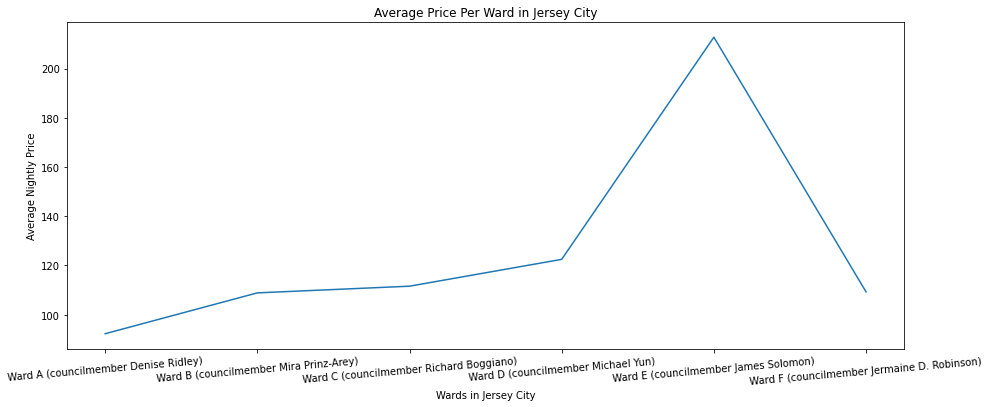

In [116]:
plt.figure(figsize=(15,6))
insights.groupby('neighbourhood_cleansed').price.mean().plot()
plt.title('Average Price Per Ward in Jersey City')
plt.ylabel('Average Nightly Price')
plt.xlabel("Wards in Jersey City")
plt.xticks(rotation=5)

In [117]:
insights['longitude'].max()


-74.01815

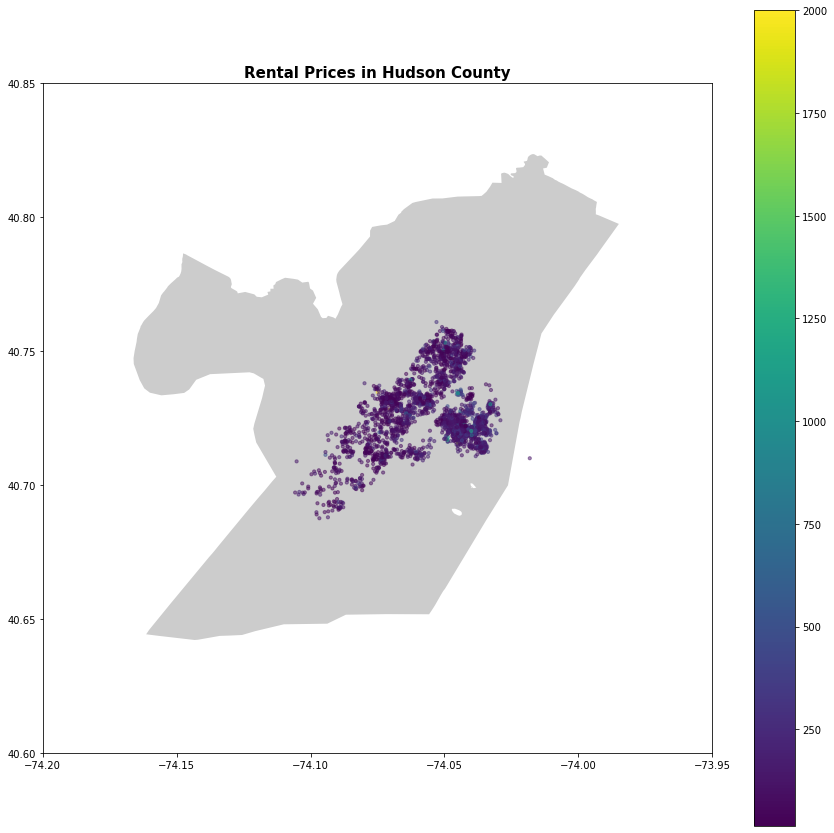

In [118]:
street_map = gpd.read_file('https://github.com/GitHubChampion/Airbnb_652/raw/master/Geography/hudson-county-geojson.geojson')

# designate coordinate system
crs = "EPSG:4326"
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(insights['longitude'], insights['latitude'])]

# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(insights,
 crs = crs,
 geometry = geometry)

# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='price',ax=ax,alpha=0.5, legend=True,markersize=10)

plt.title('Rental Prices in Hudson County', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display

plt.xlim(-74.2,-73.95)
plt.ylim(40.6,40.85)

# show map
plt.show()


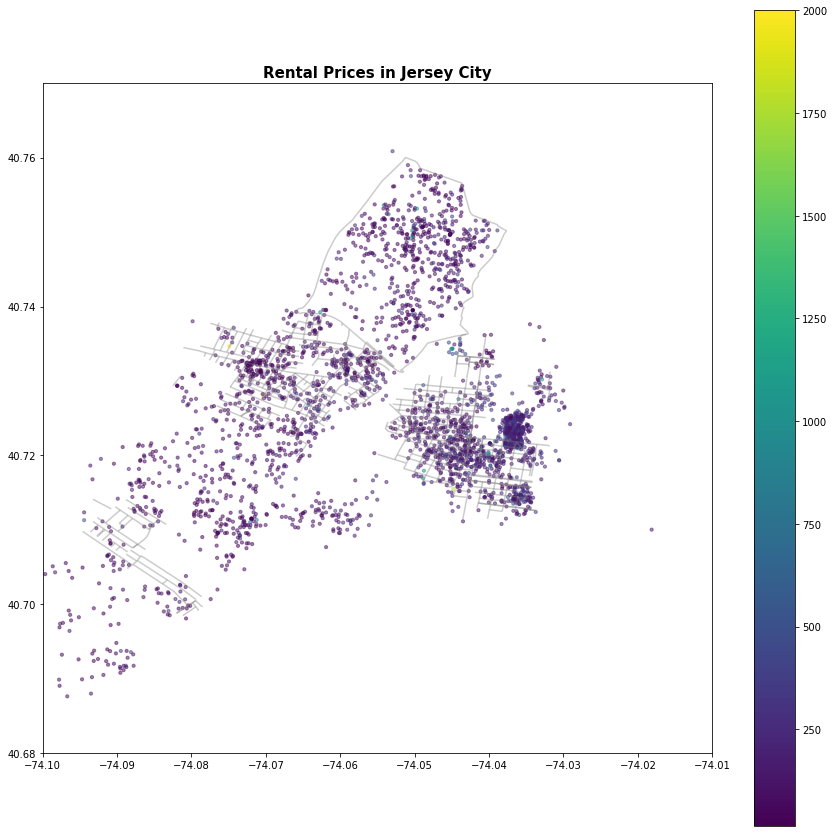

In [119]:
street_map = gpd.read_file('https://github.com/GitHubChampion/Airbnb_652/raw/master/Geography/jersey_city.geojson')

# designate coordinate system
crs = "EPSG:4326"
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(insights['longitude'], insights['latitude'])]

# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(insights,
 crs = crs,
 geometry = geometry)

# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='price',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
plt.title('Rental Prices in Jersey City', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
#plt.xlim(edited_data_set['longitude'].min(),edited_data_set['longitude'].max())
plt.xlim(-74.1,-74.01)
plt.ylim(40.68,40.77)
#plt.ylim(edited_data_set['latitude'].min(),edited_data_set['latitude'].max())
# show map
plt.show()

Text(0.5, 1.0, 'Visual Representation of Neighborhoods in Jersey City')

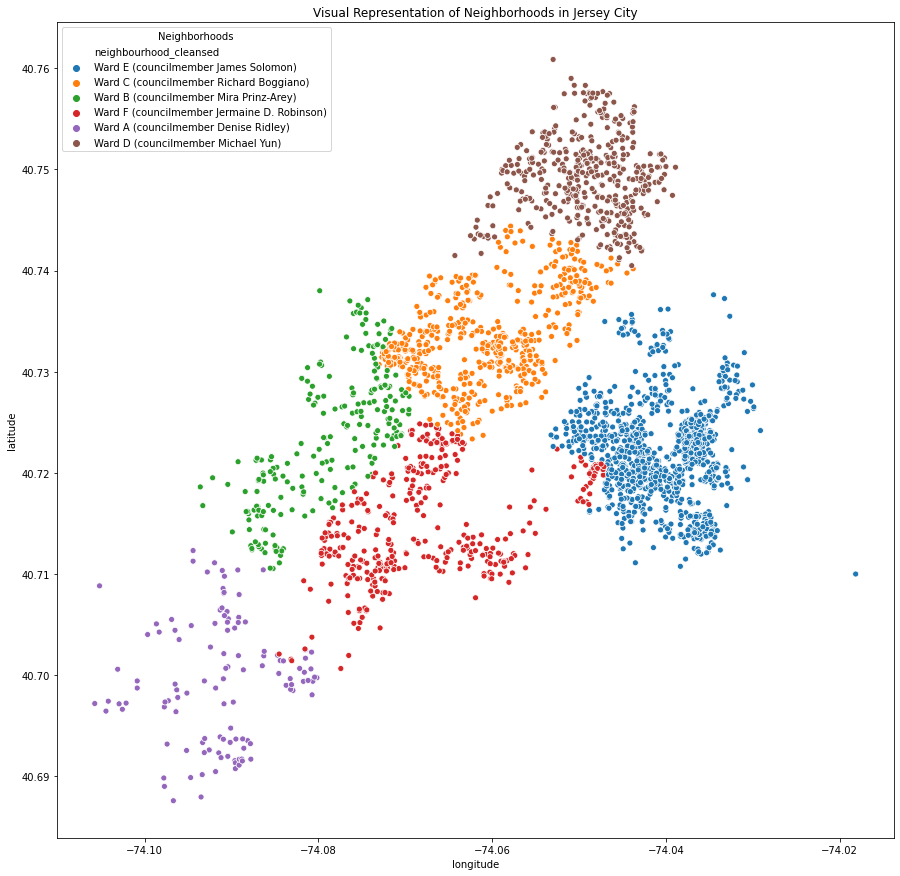

In [120]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=insights, y='latitude', x='longitude', hue='neighbourhood_cleansed')
plt.legend(title='Neighborhoods')
plt.title("Visual Representation of Neighborhoods in Jersey City")

#Correlation of Variables

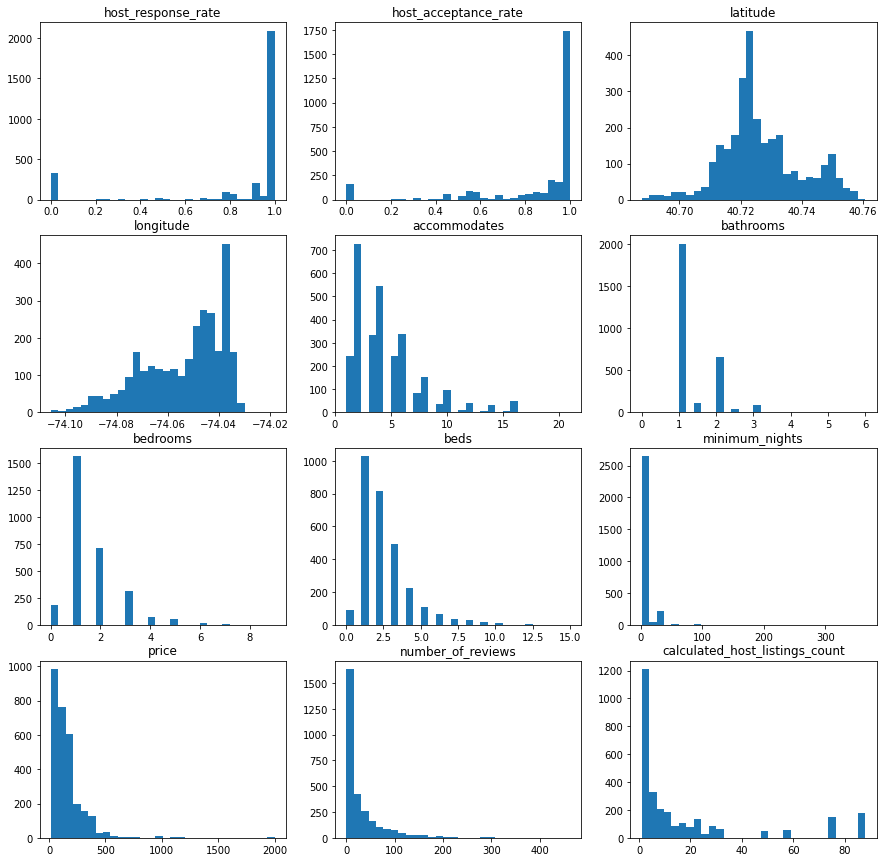

In [121]:

f, ((f1, f2, f3), (f4, f5, f6), (f7, f8, f9),(f10, f11, f12) ) = plt.subplots(4, 3, figsize=(15,15))
f1.hist(analysis['host_response_rate'], 30)
f1.set_title("host_response_rate")

f2.hist(analysis['host_acceptance_rate'], 30)
f2.set_title("host_acceptance_rate")

f3.hist(analysis['latitude'], 30)
f3.set_title("latitude")

f4.hist(analysis['longitude'], 30)
f4.set_title("longitude")

f5.hist(analysis['accommodates'], 30)
f5.set_title("accommodates")

f6.hist(analysis['bathrooms'], 30)
f6.set_title("bathrooms")

f7.hist(analysis['bedrooms'], 30)
f7.set_title("bedrooms")

f8.hist(analysis['beds'], 30)
f8.set_title("beds")

f9.hist(analysis['minimum_nights'], 30)
f9.set_title("minimum_nights")

f10.hist(analysis['price'], 30)
f10.set_title("price")

f11.hist(analysis['number_of_reviews'], 30)
f11.set_title("number_of_reviews")

f12.hist(analysis['calculated_host_listings_count'], 30)
f12.set_title("calculated_host_listings_count")


plt.show()

In [0]:
#Normalize Variables
analysis['price']= np.log(analysis['price']+1)
analysis['minimum_nights']= np.log(analysis['minimum_nights']+1)
analysis['number_of_reviews']= np.log(analysis['number_of_reviews']+1)

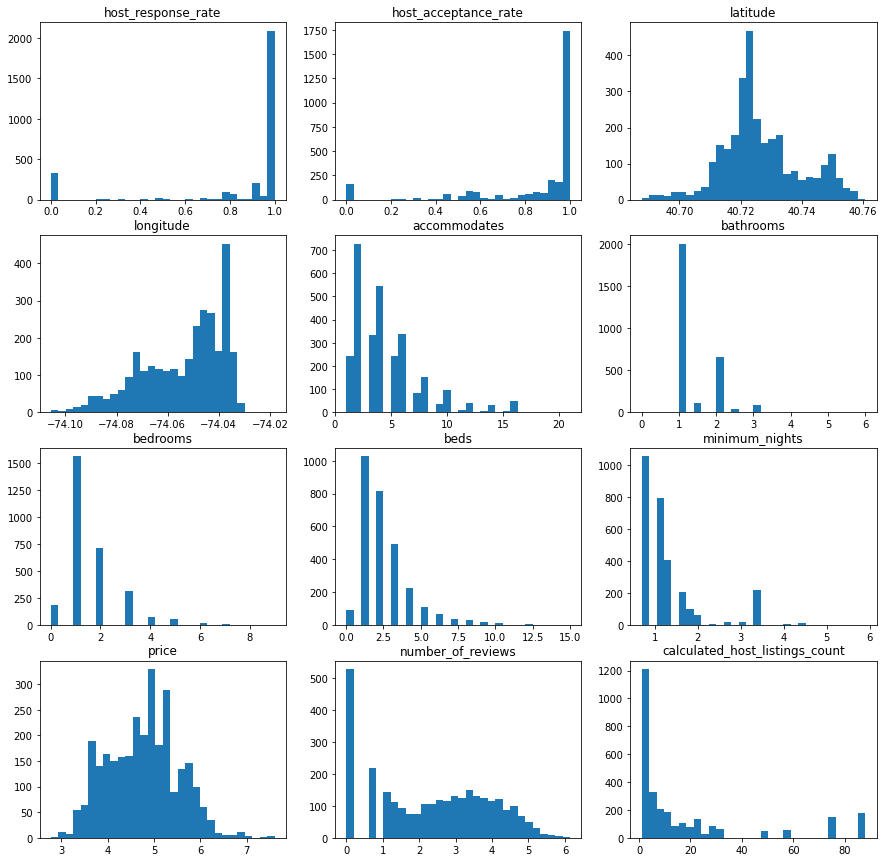

In [123]:
#After Normalizing values
f, ((f1, f2, f3), (f4, f5, f6), (f7, f8, f9),(f10, f11, f12) ) = plt.subplots(4, 3, figsize=(15,15))
f1.hist(analysis['host_response_rate'], 30)
f1.set_title("host_response_rate")

f2.hist(analysis['host_acceptance_rate'], 30)
f2.set_title("host_acceptance_rate")

f3.hist(analysis['latitude'], 30)
f3.set_title("latitude")

f4.hist(analysis['longitude'], 30)
f4.set_title("longitude")

f5.hist(analysis['accommodates'], 30)
f5.set_title("accommodates")

f6.hist(analysis['bathrooms'], 30)
f6.set_title("bathrooms")

f7.hist(analysis['bedrooms'], 30)
f7.set_title("bedrooms")

f8.hist(analysis['beds'], 30)
f8.set_title("beds")

f9.hist(analysis['minimum_nights'], 30)
f9.set_title("minimum_nights")

f10.hist(analysis['price'], 30)
f10.set_title("price")

f11.hist(analysis['number_of_reviews'], 30)
f11.set_title("number_of_reviews")

f12.hist(analysis['calculated_host_listings_count'], 30)
f12.set_title("calculated_host_listings_count")


plt.show()

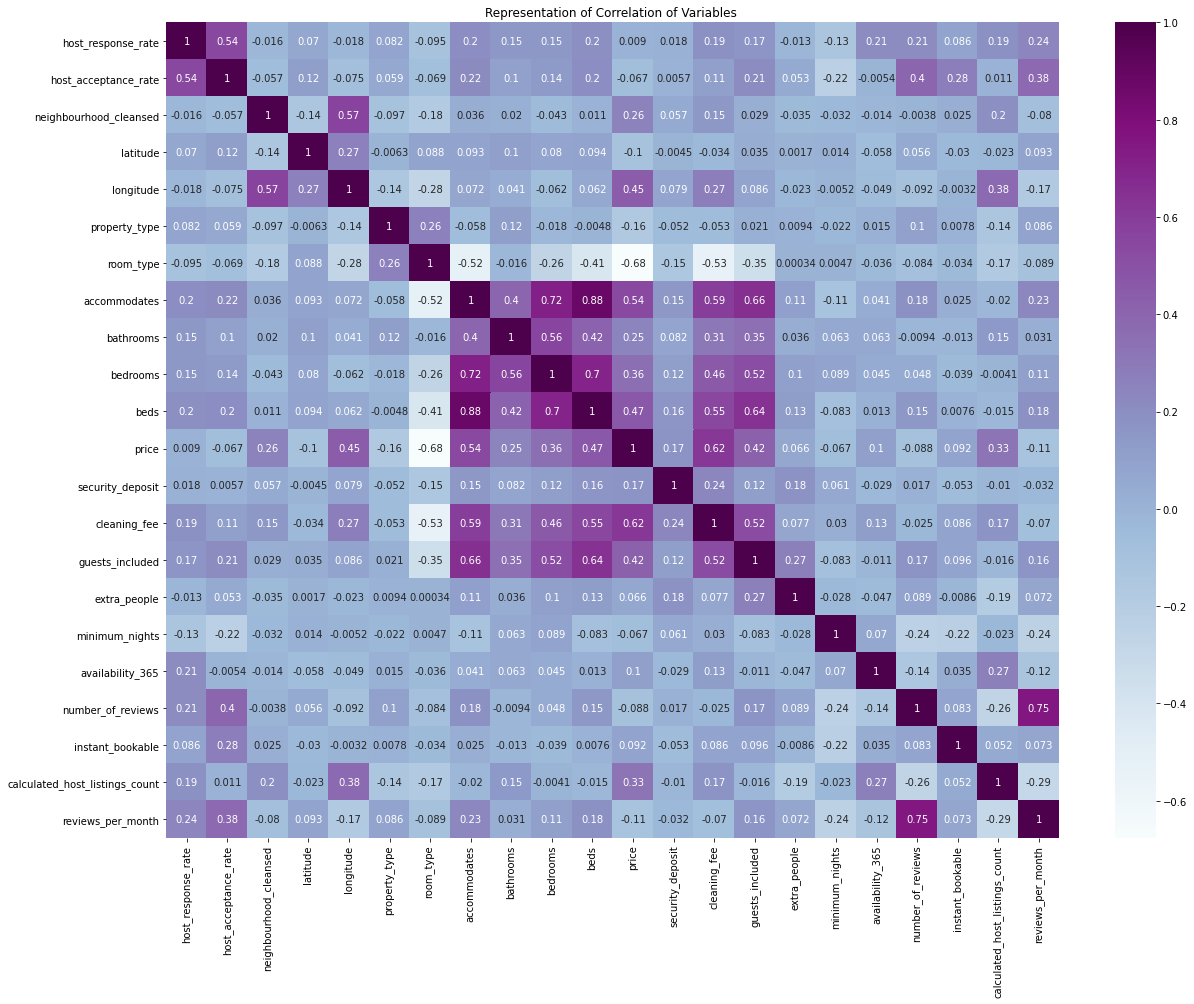

In [124]:
map = analysis.corr()
plt.figure(figsize=(20,15))
plt.title('Representation of Correlation of Variables ')
plt.ylabel('Features')
plt.xlabel("Features")
sns.heatmap(map, annot=True, cmap='BuPu')

In [125]:
analysis.apply(lambda col: len(col.unique()))

host_response_rate                  34
host_acceptance_rate                64
neighbourhood_cleansed               6
latitude                          1997
longitude                         2080
property_type                       16
room_type                            4
accommodates                        17
bathrooms                           11
bedrooms                            10
beds                                15
price                              300
security_deposit                    50
cleaning_fee                       111
guests_included                     16
extra_people                        50
minimum_nights                      35
availability_365                   360
number_of_reviews                  209
instant_bookable                     2
calculated_host_listings_count      31
reviews_per_month                  547
dtype: int64

In [126]:
analysis_with_dummies = pd.get_dummies(analysis, columns = ['neighbourhood_cleansed', 'room_type','property_type', 'instant_bookable'], drop_first=True)
analysis_with_dummies.shape



(2940, 42)

In [127]:
analysis_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2940 entries, 0 to 2939
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_rate              2940 non-null   float64
 1   host_acceptance_rate            2940 non-null   float64
 2   latitude                        2940 non-null   float64
 3   longitude                       2940 non-null   float64
 4   accommodates                    2940 non-null   int64  
 5   bathrooms                       2940 non-null   float64
 6   bedrooms                        2940 non-null   float64
 7   beds                            2940 non-null   float64
 8   price                           2940 non-null   float64
 9   security_deposit                2940 non-null   float64
 10  cleaning_fee                    2940 non-null   float64
 11  guests_included                 2940 non-null   int64  
 12  extra_people                    29

#Create OLS Model


In [0]:
y = analysis_with_dummies["price"]
X = analysis_with_dummies.drop(["price"], axis=1)

In [0]:
#Add constant
X = sm.add_constant(X)

In [130]:
X

,const,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_365,number_of_reviews,calculated_host_listings_count,reviews_per_month,neighbourhood_cleansed_1,neighbourhood_cleansed_2,neighbourhood_cleansed_3,neighbourhood_cleansed_4,neighbourhood_cleansed_5,room_type_1,room_type_2,room_type_3,property_type_1,property_type_2,property_type_3,property_type_4,property_type_5,property_type_6,property_type_7,property_type_8,property_type_9,property_type_10,property_type_11,property_type_12,property_type_13,property_type_14,property_type_15,instant_bookable_1
0,1.0,1.00,0.97,40.72613,-74.04811,2,1.0,1.0,1.0,500.0,95.0,2,75,3.367296,270,3.737670,3,0.69,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1.0,0.00,0.80,40.73742,-74.05255,2,1.0,1.0,0.0,0.0,0.0,2,25,1.386294,363,2.397895,2,0.09,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1.00,1.00,40.72543,-74.06369,4,1.0,1.0,1.0,300.0,60.0,2,20,1.386294,338,5.273000,1,1.71,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,0.00,0.00,40.72119,-74.04085,3,1.0,1.0,1.0,2000.0,175.0,2,100,2.772589,362,1.098612,1,0.02,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,0.00,0.00,40.72813,-74.07037,4,2.0,2.0,3.0,3000.0,150.0,3,50,5.017280,365,0.000000,1,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,1.0,1.00,1.00,40.73497,-74.04703,2,1.0,1.0,1.0,0.0,50.0,3,15,1.386294,252,0.000000,1,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2936,1.0,0.00,0.00,40.73020,-74.03288,1,1.0,1.0,1.0,0.0,0.0,1,0,3.433987,174,0.000000,1,0.00,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2937,1.0,0.00,0.00,40.73428,-74.07155,2,1.0,1.0,1.0,0.0,0.0,1,0,0.693147,172,0.000000,1,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2938,1.0,0.87,1.00,40.74587,-74.04749,12,4.0,6.0,6.0,2500.0,350.0,1,0,0.693147,345,0.000000,3,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [131]:
#Create OLS Model
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        19:26:21   Log-Likelihood:                -1499.2
No. Observations:                2940   AIC:                             3082.
Df Residuals:                    2898   BIC:                             3334.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [0]:
#Property_Type doesn't appear to have a significant impact on price due to values around 0.8
#Dropping property_type
analysis_with_dummies = analysis_with_dummies.drop(["property_type_1","property_type_2", "property_type_3", "property_type_4", 'property_type_5'], axis=1)
analysis_with_dummies = analysis_with_dummies.drop(["property_type_6","property_type_7", "property_type_8", "property_type_9", 'property_type_10'], axis=1)
analysis_with_dummies = analysis_with_dummies.drop(["property_type_11","property_type_12", "property_type_13", "property_type_14", 'property_type_15'], axis=1)


X = analysis_with_dummies.drop(["price"], axis=1)
X = sm.add_constant(X)

In [133]:
X

,const,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_365,number_of_reviews,calculated_host_listings_count,reviews_per_month,neighbourhood_cleansed_1,neighbourhood_cleansed_2,neighbourhood_cleansed_3,neighbourhood_cleansed_4,neighbourhood_cleansed_5,room_type_1,room_type_2,room_type_3,instant_bookable_1
0,1.0,1.00,0.97,40.72613,-74.04811,2,1.0,1.0,1.0,500.0,95.0,2,75,3.367296,270,3.737670,3,0.69,0,0,0,1,0,0,0,0,1
1,1.0,0.00,0.80,40.73742,-74.05255,2,1.0,1.0,0.0,0.0,0.0,2,25,1.386294,363,2.397895,2,0.09,0,1,0,0,0,0,1,0,0
2,1.0,1.00,1.00,40.72543,-74.06369,4,1.0,1.0,1.0,300.0,60.0,2,20,1.386294,338,5.273000,1,1.71,0,1,0,0,0,0,0,0,0
3,1.0,0.00,0.00,40.72119,-74.04085,3,1.0,1.0,1.0,2000.0,175.0,2,100,2.772589,362,1.098612,1,0.02,0,0,0,1,0,0,0,0,0
4,1.0,0.00,0.00,40.72813,-74.07037,4,2.0,2.0,3.0,3000.0,150.0,3,50,5.017280,365,0.000000,1,0.00,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,1.0,1.00,1.00,40.73497,-74.04703,2,1.0,1.0,1.0,0.0,50.0,3,15,1.386294,252,0.000000,1,0.00,0,0,0,1,0,0,0,0,1
2936,1.0,0.00,0.00,40.73020,-74.03288,1,1.0,1.0,1.0,0.0,0.0,1,0,3.433987,174,0.000000,1,0.00,0,0,0,1,0,0,1,0,0
2937,1.0,0.00,0.00,40.73428,-74.07155,2,1.0,1.0,1.0,0.0,0.0,1,0,0.693147,172,0.000000,1,0.00,1,0,0,0,0,0,0,0,0
2938,1.0,0.87,1.00,40.74587,-74.04749,12,4.0,6.0,6.0,2500.0,350.0,1,0,0.693147,345,0.000000,3,0.00,0,0,1,0,0,0,0,0,0


In [134]:
#ReTry OLS Model
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     278.4
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        19:26:21   Log-Likelihood:                -1521.4
No. Observations:                2940   AIC:                             3097.
Df Residuals:                    2913   BIC:                             3258.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#Begining to Train and Split Test Data from Evaluation Data

In [0]:
from sklearn.linear_model import Lasso, LassoCV, LassoLarsCV, lars_path
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [137]:
X_train.shape

(2352, 27)

In [138]:
X_test.shape

(588, 27)

In [0]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [0]:
x_train_s = scaler.transform(X_train)
x_test_s = scaler.transform(X_test)

#LassoCV Regression Model

In [239]:
model_lassoCV = LassoCV(cv=10, normalize=False)
model_lassoCV.fit(x_train_s, y_train) 
print(model_lassoCV.alpha_)

0.000473402415846279


In [256]:
model_lasso = Lasso(alpha = model_lassoCV.alpha_, normalize=True)
model_lasso.fit(x_train_s, y_train)
model_lasso.coef_

array([ 0.00000000e+00, -3.97578459e-02, -7.50623926e-02, -3.53291914e-02,
        1.08579209e-01,  1.45893519e-01,  5.29313263e-02,  2.29390772e-02,
        0.00000000e+00,  4.59587782e-03,  1.29133794e-01,  8.17578252e-03,
        2.56082368e-02, -3.50079297e-02,  1.18445226e-02, -1.47585316e-02,
        8.40031715e-02, -1.48036949e-02,  0.00000000e+00, -0.00000000e+00,
       -1.11085673e-04,  7.59119377e-02, -0.00000000e+00, -0.00000000e+00,
       -2.46349608e-01, -9.31926141e-02,  3.23881763e-02])

In [257]:
#Beta coefiecnts greater than zero . lower alpha less penalty more variables
#lasso provides penalty to more complicated models to provide a better sample prediction
X.columns[np.abs(model_lasso.coef_) > 0]

Index(['host_response_rate', 'host_acceptance_rate', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'availability_365', 'number_of_reviews',
       'calculated_host_listings_count', 'reviews_per_month',
       'neighbourhood_cleansed_3', 'neighbourhood_cleansed_4', 'room_type_2',
       'room_type_3', 'instant_bookable_1'],
      dtype='object')

In [0]:
alphas_lasso, coefs_lasso, _ = model_lasso.path(x_train_s, y_train)

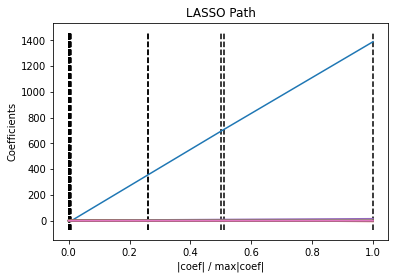

In [255]:
_, _, coefs = lars_path(X_train.values, y_train.values.flatten(), method='lasso')

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

In [0]:
y_hat_CV_test = model_lassoCV.predict(x_test_s)
y_hat_CV_train = model_lassoCV.predict(x_train_s)

In [232]:

print("LassoCV Train set Metrics Mean Squared Error: ", metrics.mean_squared_error(y_true=y_train, y_pred=y_hat_CV_train))
print("LassoCV Train set Metrics Mean Absolute Error: ", metrics.mean_absolute_error(y_true=y_train, y_pred=y_hat_CV_train))
print("LassoCV Train set Metrics Median Absolute Error: ", metrics.median_absolute_error(y_true=y_train, y_pred=y_hat_CV_train))
print('R-Squared classifier accuracy is {:.2f}'.format(model_lassoCV.score(x_train_s, y_train)))
print("=======================================================================================")
print("LassoCV Test set Metrics Mean Squared Error: ", metrics.mean_squared_error(y_true=y_test, y_pred=y_hat_CV_test))
print("LassoCV Test set Metrics Mean Absolute Error: ", metrics.mean_absolute_error(y_true=y_test, y_pred=y_hat_CV_test))
print("LassoCV Test set Metrics Median Absolute Error: ", metrics.median_absolute_error(y_true=y_test, y_pred=y_hat_CV_test))
print('R-Squared classifier accuracy is {:.2f}'.format(model_lassoCV.score(x_test_s, y_test)))

LassoCV Train set Metrics Mean Squared Error:  0.17177340997180326
LassoCV Train set Metrics Mean Absolute Error:  0.28772817637043
LassoCV Train set Metrics Median Absolute Error:  0.2136282556295246
R-Squared classifier accuracy is 0.70
LassoCV Test set Metrics Mean Squared Error:  0.14060186384111112
LassoCV Test set Metrics Mean Absolute Error:  0.2826978079152533
LassoCV Test set Metrics Median Absolute Error:  0.2166577772831051
R-Squared classifier accuracy is 0.75


#Ridge Regression Model


In [233]:

from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoLarsIC


model_Ridge = Ridge(alpha=model_lassoCV.alpha_) 
model_Ridge.fit(x_train_s, y_train)
y_hat_Ridge_test = model_Ridge.predict(x_test_s)
y_hat_Ridge_train = model_Ridge.predict(x_train_s)

print(model_Ridge.coef_)


print("Ridge Model Test set Metrics Mean Squared Error: ", metrics.mean_squared_error(y_true=y_test, y_pred=y_hat_Ridge_test))
print("Ridge Model Test Mean Absolute Error: ", metrics.mean_absolute_error(y_true=y_test, y_pred=y_hat_Ridge_test))
print("Ridge Model Test Median Absolute Error: ", metrics.median_absolute_error(y_true=y_test, y_pred=y_hat_Ridge_test))
print('R-Squared classifier accuracy is {:.2f}'.format(model_Ridge.score(x_test_s, y_test)))
print("=======================================================================================")
print("Ridge Model Train set Metrics Mean Squared Error: ", metrics.mean_squared_error(y_true=y_train, y_pred=y_hat_Ridge_train))
print("Ridge Model Train set Metrics Mean Absolute Error: ", metrics.mean_absolute_error(y_true=y_train, y_pred=y_hat_Ridge_train))
print("Ridge Model Train set Metrics Median Absolute Error: ", metrics.median_absolute_error(y_true=y_train, y_pred=y_hat_Ridge_train))
print('R-Squared classifier accuracy is {:.2f}'.format(model_Ridge.score(x_train_s, y_train)))




[ 0.         -0.06193076 -0.09114261 -0.07522083  0.24977964  0.12940313
  0.0773575   0.04865726  0.01349359  0.0223628   0.10444286  0.00888707
  0.04549435 -0.06588861  0.04026979 -0.02693213  0.0858864  -0.02035617
 -0.01698168 -0.08660557 -0.11116898 -0.12841165 -0.083603   -0.02536908
 -0.27018473 -0.1202345   0.06147683]
Index(['host_response_rate', 'host_acceptance_rate', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'availability_365', 'number_of_reviews',
       'calculated_host_listings_count', 'reviews_per_month',
       'neighbourhood_cleansed_1', 'neighbourhood_cleansed_2',
       'neighbourhood_cleansed_3', 'neighbourhood_cleansed_4',
       'neighbourhood_cleansed_5', 'room_type_1', 'room_type_2', 'room_type_3',
       'instant_bookable_1'],
      dtype='object')
Ridge Model Test set Metrics Mean Squared Error:  0.14066418457854965
Ri

#Linear Regression Model


In [0]:
linear_model = LinearRegression()
linear_model.fit(x_train_s, y_train)
y_hat_Linear_test = linear_model.predict(scaler.transform((x_test_s))) 
y_hat_Linear_train = linear_model.predict(scaler.transform((x_train_s))) 


In [223]:

print("Intercept of Linear Model:", linear_model.intercept_)

Intercept of Linear Model: 4.763666813027019


In [221]:
print("Linear Model Test set Metrics Mean Squared Error: ", metrics.mean_squared_error(y_true=y_test, y_pred=y_hat_Linear_test))
print("Linear Model Test Mean Absolute Error: ", metrics.mean_absolute_error(y_true=y_test, y_pred=y_hat_Linear_test))
print("Linear Model Test Median Absolute Error: ", metrics.median_absolute_error(y_true=y_test, y_pred=y_hat_Linear_test))
print('R-Squared classifier accuracy is {:.2f}'.format(linear_model.score(x_test_s, y_test)))
print("=======================================================================================")
print("Linear Model Train set Metrics Mean Squared Error: ", metrics.mean_squared_error(y_true=y_train, y_pred=y_hat_Linear_train))
print("Linear Model Train set Metrics Mean Absolute Error: ", metrics.mean_absolute_error(y_true=y_train, y_pred=y_hat_Linear_train))
print("Linear Model Train set Metrics Median Absolute Error: ", metrics.median_absolute_error(y_true=y_train, y_pred=y_hat_Linear_train))
print('classifier accuracy is {:.2f}'.format(linear_model.score(x_train_s, y_train)))


Linear Model Test set Metrics Mean Squared Error:  1917415.826141587
Linear Model Test Mean Absolute Error:  1384.6324492646886
Linear Model Test Median Absolute Error:  1382.802438969201
R-Squared classifier accuracy is 0.75
Linear Model Train set Metrics Mean Squared Error:  1917374.716088885
Linear Model Train set Metrics Mean Absolute Error:  1384.6129310541996
Linear Model Train set Metrics Median Absolute Error:  1382.7571718384543
classifier accuracy is 0.70
